 # ==============================================================================
# Phase 1: Data Analysis & Feature Engineering
# ==============================================================================
#
# FinRisk: Credit Risk Assessment & Fraud Detection Engine
#
# Script 1: Exploratory Data Analysis (EDA)
#
# ==============================================================================

In [25]:
# ------------------------------------------------------------------------------
# 1. Import Libraries
# ------------------------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configure settings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


In [26]:
# ------------------------------------------------------------------------------
# 2. Load Datasets
# ------------------------------------------------------------------------------
print("--- Loading Datasets ---")



# define the paths
try:
    credit_applications = pd.read_csv('../data/raw/credit_applications.csv')
    transaction_data = pd.read_csv('../data/raw/transaction_data.csv')
    customer_profiles = pd.read_csv('../data/raw/customer_profiles.csv')
    credit_bureau_data = pd.read_csv('../data/raw/credit_bureau_data.csv')
    model_predictions = pd.read_csv('../data/raw/model_predictions.csv')
    datasets = {
        "Credit Applications": credit_applications,
        "Transaction Data": transaction_data,
        "Customer Profiles": customer_profiles,
        "Credit Bureau Data": credit_bureau_data,
        "Model Predictions": model_predictions
    }
    print("All datasets loaded successfully.")
except FileNotFoundError as e:
    print(f"Error loading datasets: {e}. Please ensure the CSV files are in the correct directory.")
    exit()
# ...existing code...

print("\n" + "="*80 + "\n")  # End of Data Loading Section

--- Loading Datasets ---
All datasets loaded successfully.




In [27]:
# ------------------------------------------------------------------------------
# 3. Initial Data Inspection
# ------------------------------------------------------------------------------
print("--- Initial Data Inspection ---")

for name, df in datasets.items():
    print(f"--- {name} ---")
    print(f"Shape: {df.shape}")
    print("\nInfo:")
    df.info()
    print("\nFirst 5 Rows:")
    print(df.head())
    print("\nDescriptive Statistics:")
    print(df.describe(include='all'))
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nDuplicates:")
    print(df.duplicated().sum())
    print("\n" + "="*80 + "\n")



--- Initial Data Inspection ---
--- Credit Applications ---
Shape: (100000, 11)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   application_id        100000 non-null  object 
 1   customer_id           100000 non-null  object 
 2   application_date      100000 non-null  object 
 3   loan_amount           100000 non-null  int64  
 4   loan_purpose          100000 non-null  object 
 5   employment_status     100000 non-null  object 
 6   annual_income         100000 non-null  float64
 7   debt_to_income_ratio  100000 non-null  float64
 8   credit_score          100000 non-null  int64  
 9   application_status    100000 non-null  object 
 10  default_flag          100000 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 8.4+ MB

First 5 Rows:
  application_id  customer_id application_date  lo

## Comment:
1. Missing values :  Model Predictions file has 50% missing values in 'risk_score' and 'fraud_probability' features. 
2. No Duplicates observed
3. Customer Age:  The age ranges between 18 years and 247 years, which indicate presence of outliers in the data.



## Univariate Analysis 


## 1.0 Credit Applications

--- Exploratory Data Analysis (EDA) ---

--- Analysis of Credit Applications ---


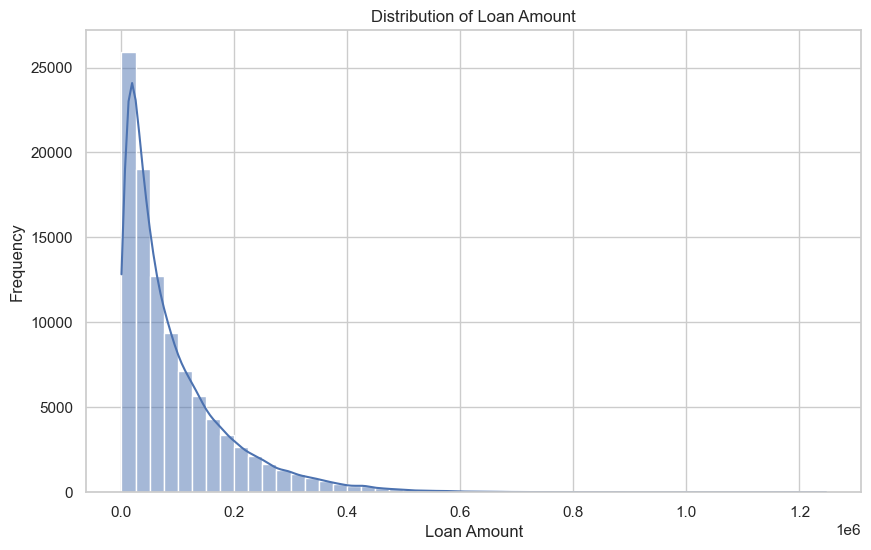

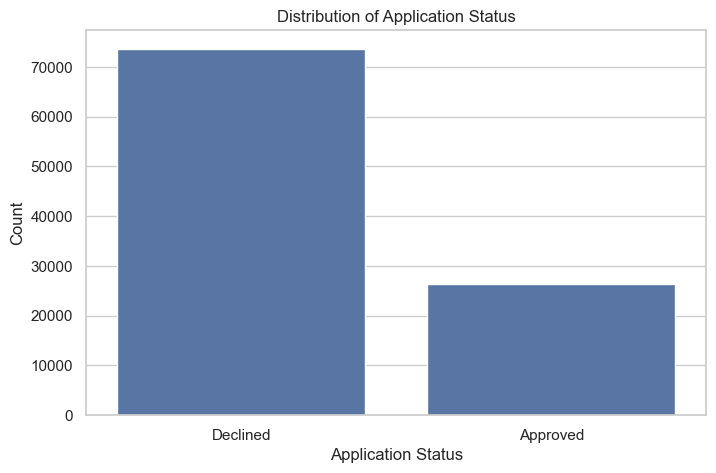

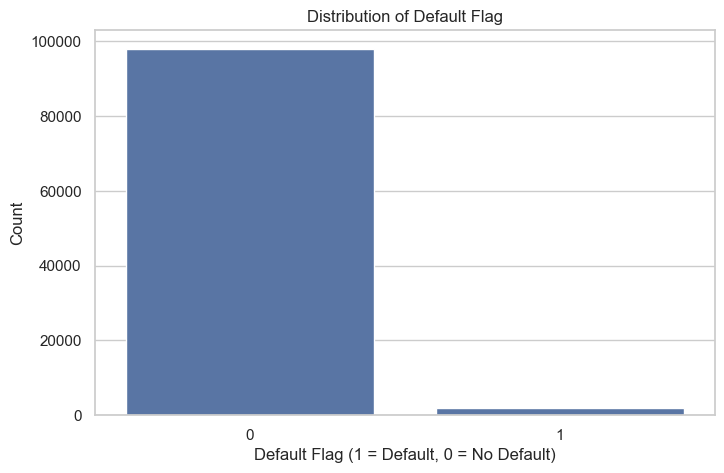

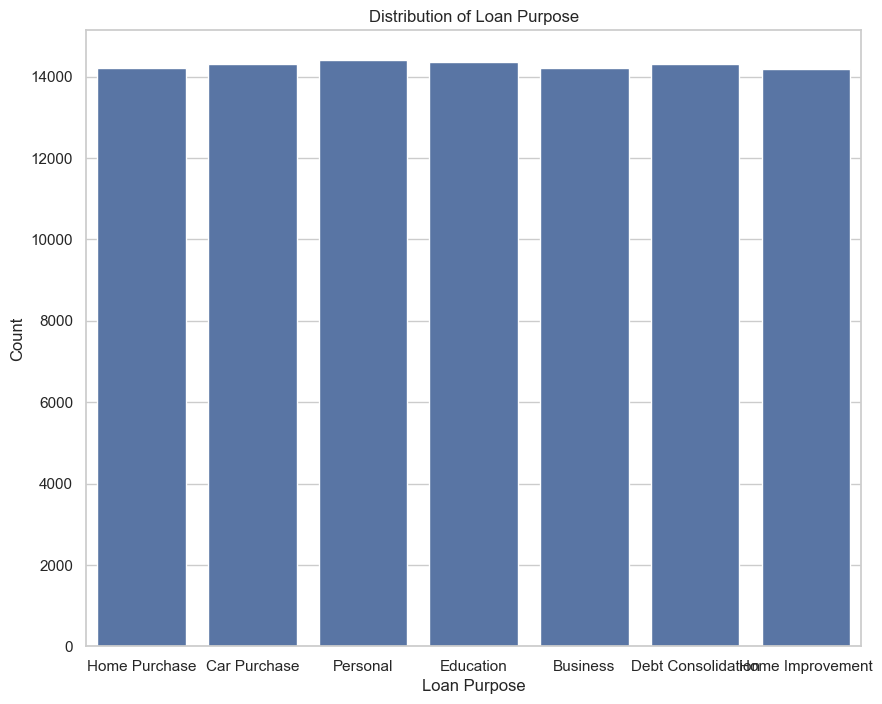

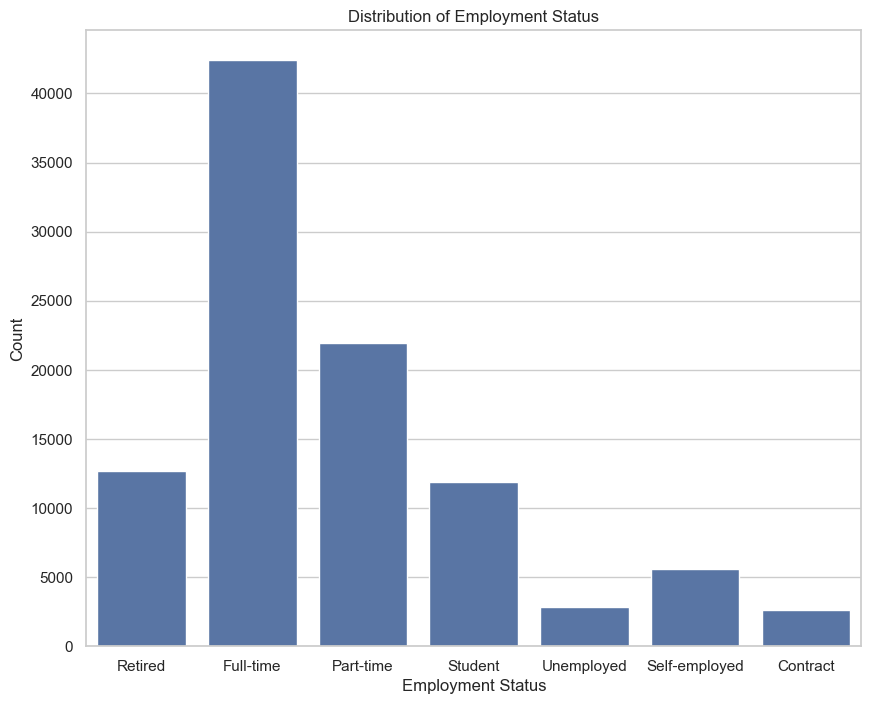

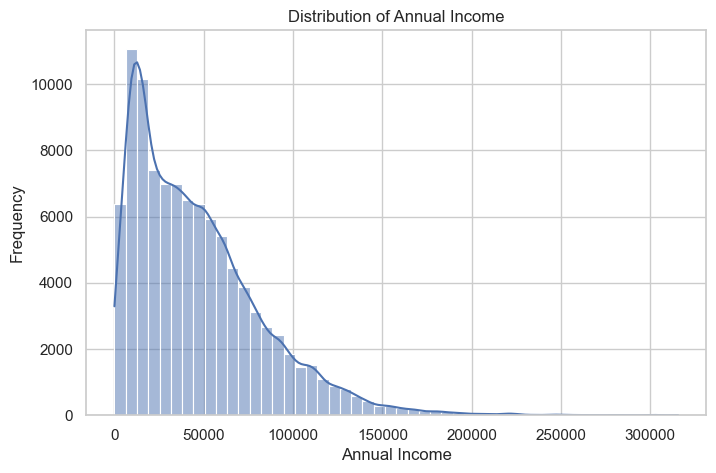

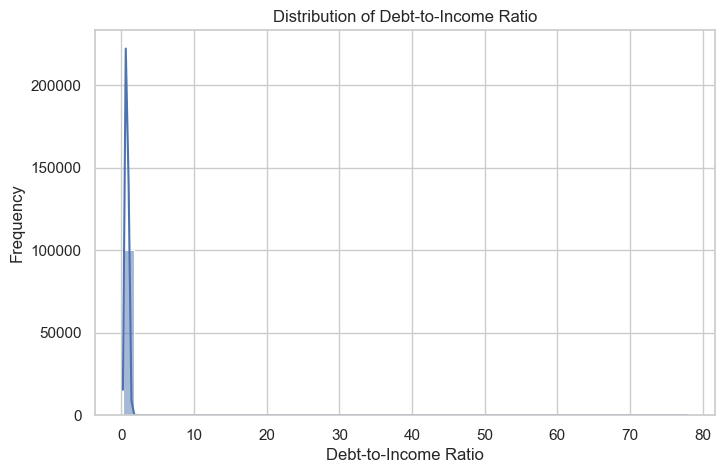

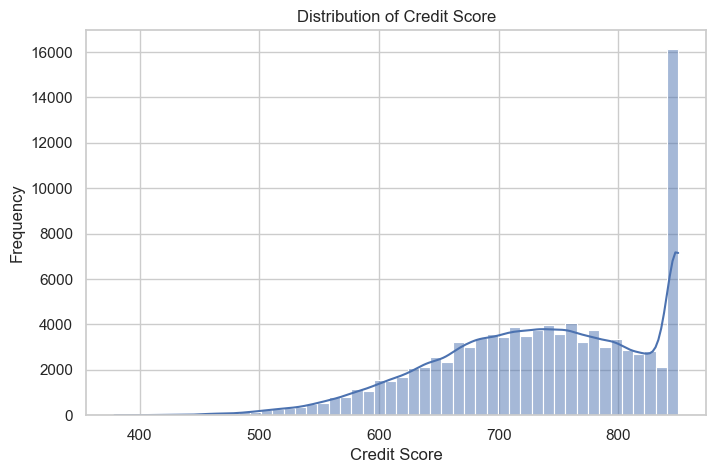

In [28]:
# ------------------------------------------------------------------------------
# 4. Exploratory Data Analysis (EDA)
# ------------------------------------------------------------------------------
print("--- Exploratory Data Analysis (EDA) ---")

# --- 4.1 Credit Applications Analysis ---
print("\n--- Analysis of Credit Applications ---")

# Plot distribution of loan amount
plt.figure(figsize=(10, 6))
sns.histplot(credit_applications['loan_amount'], kde=True, bins=50)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Plot application status
plt.figure(figsize=(8, 5))
sns.countplot(x='application_status', data=credit_applications)
plt.title('Distribution of Application Status')
plt.xlabel('Application Status')
plt.ylabel('Count')
plt.show()

# Plot default flag
plt.figure(figsize=(8, 5))
sns.countplot(x='default_flag', data=credit_applications)
plt.title('Distribution of Default Flag')
plt.xlabel('Default Flag (1 = Default, 0 = No Default)')
plt.ylabel('Count')
plt.show()

# Plot loan purpose
plt.figure(figsize=(10, 8))
sns.countplot(x='loan_purpose', data=credit_applications)
plt.title('Distribution of Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.show()

# Plot employment status
plt.figure(figsize=(10, 8))
sns.countplot(x='employment_status', data=credit_applications)
plt.title('Distribution of Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.show()

# Plot annual income
plt.figure(figsize=(8, 5))
sns.histplot(credit_applications['annual_income'], kde=True, bins=50)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

# Plot debt-to-income ratio
plt.figure(figsize=(8, 5))
sns.histplot(credit_applications['debt_to_income_ratio'], kde=True, bins=50)
plt.title('Distribution of Debt-to-Income Ratio')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Frequency')
plt.show()

# Plot credit score
plt.figure(figsize=(8, 5))
sns.histplot(credit_applications['credit_score'], kde=True, bins=50)
plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()


## Comment:

1. Default Flag : Ratio of default is 1: 0.019, less than 1.9%
2. Application_status : Approve rate - 26% , Declined rate - 73%
3. Loan_amount : Ranges between £ 1,000 and £34,943
4. Loan_purpose :  The loan purpose among the 7 distinct categories are fairly even at 14%, they are: Home Purchase, Car Purchase, Personal, Education,     Business,  Debt Consolidation,  Home Improvement.

5. Employment_status : There 7 distinct categories here : Retired = 12.6% , Full-time = 42.5% , Part-time = 21.9% , Student = 11.8% , Unemployed = 2.8%, Self-employed = 5.6% , Contract = 2.6%. 

6. Annual_income : The range is between £16,000 and £31,550
7. Debt_to_income_ratio	: The range is 0.20 and 77.79
8. Credit_score:  Range is between 379 and 850.



------- Analysis of Transaction Data -------

------- Transaction_Data Univariate Analysis -------


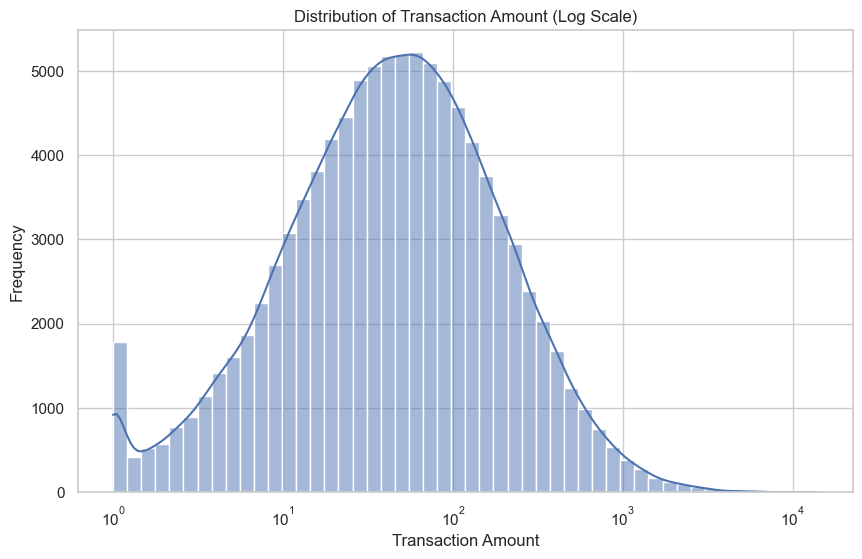

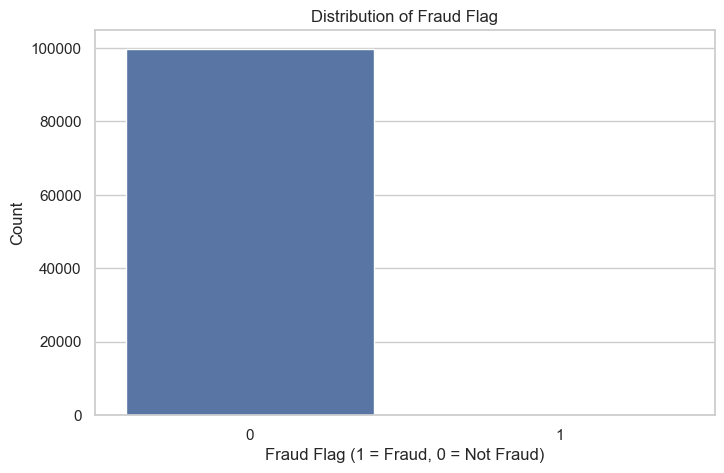

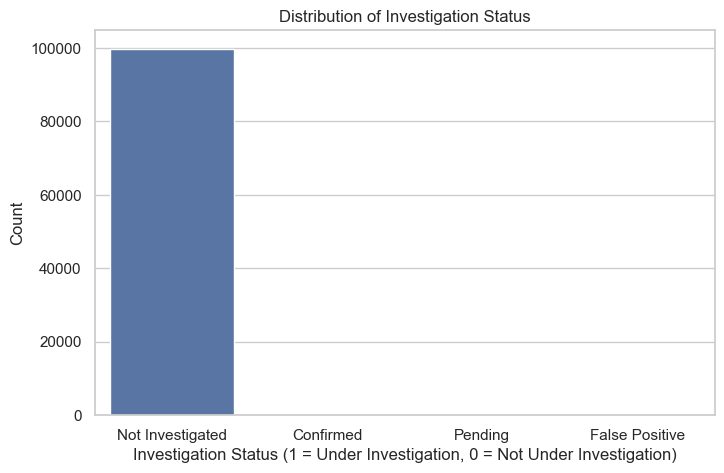

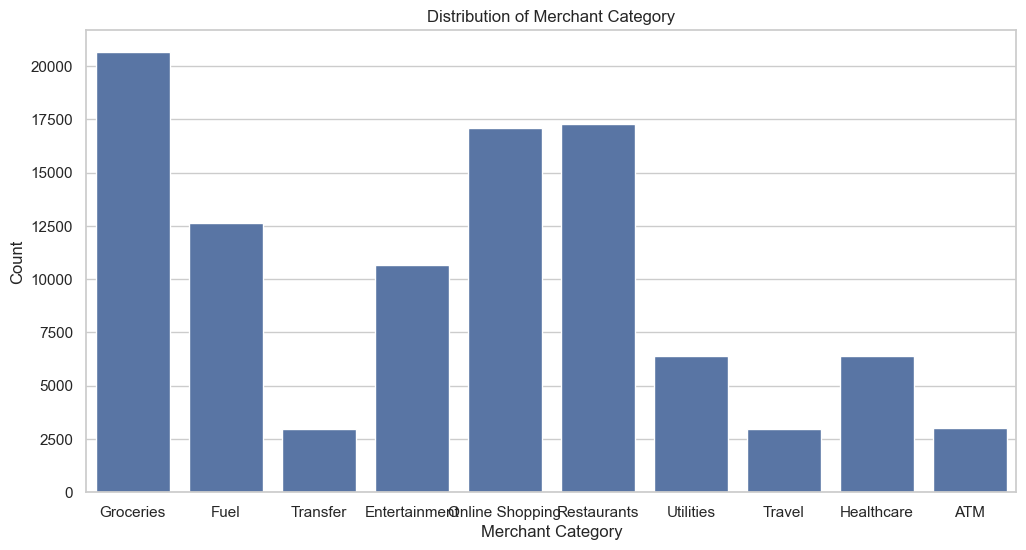

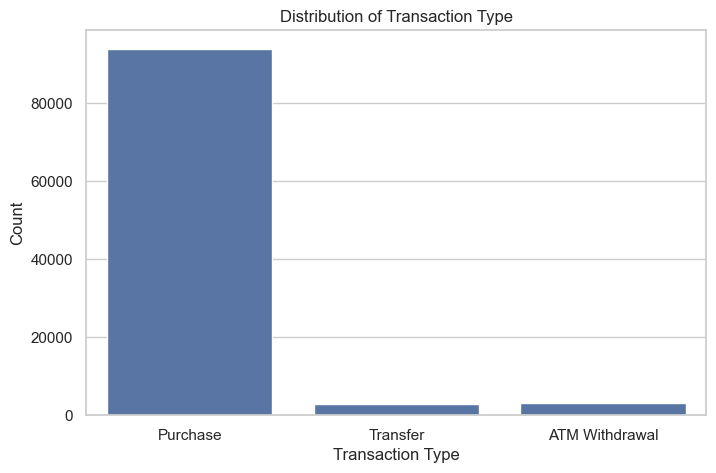

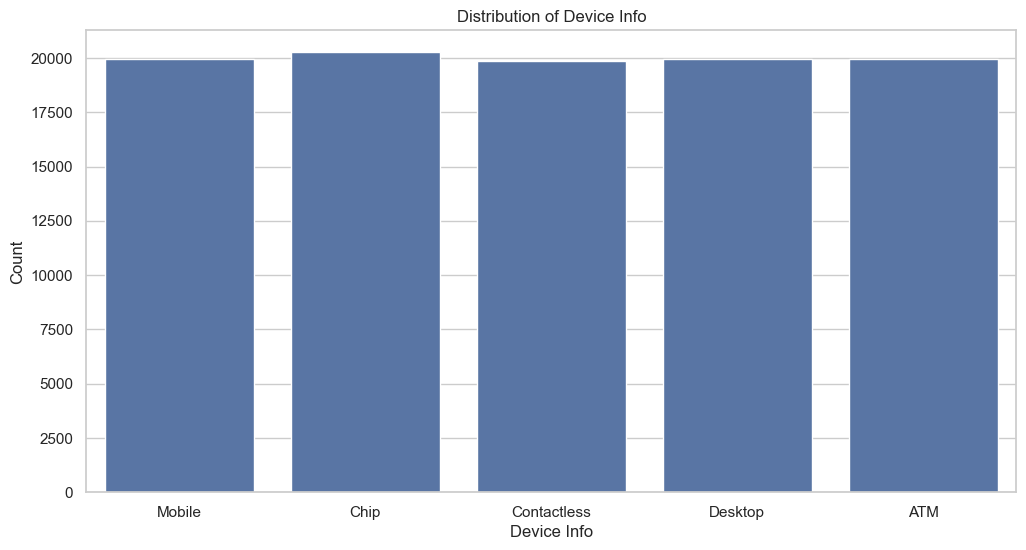

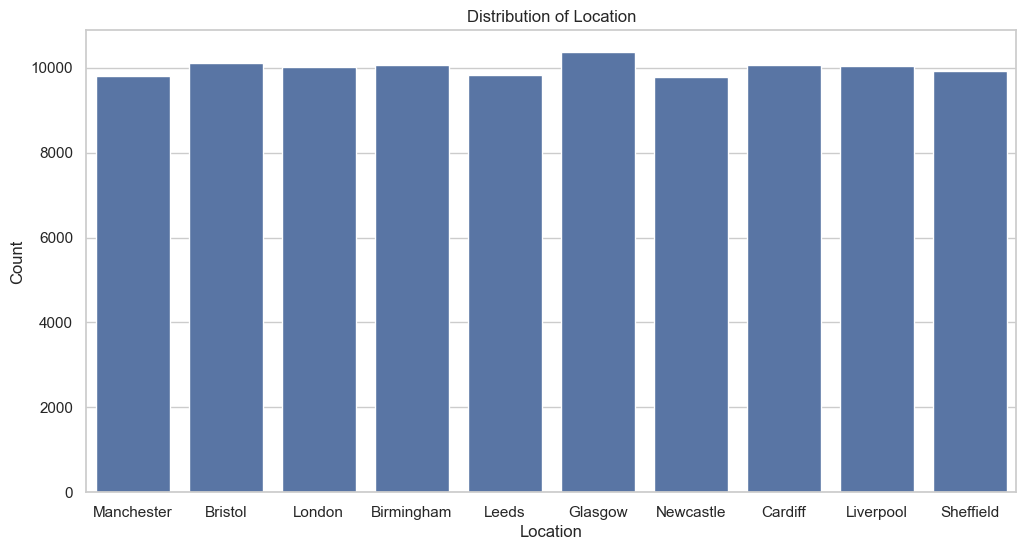


------- Customer_Profile Univariate Analysis -------

--- Analysis of Customer Profiles ---


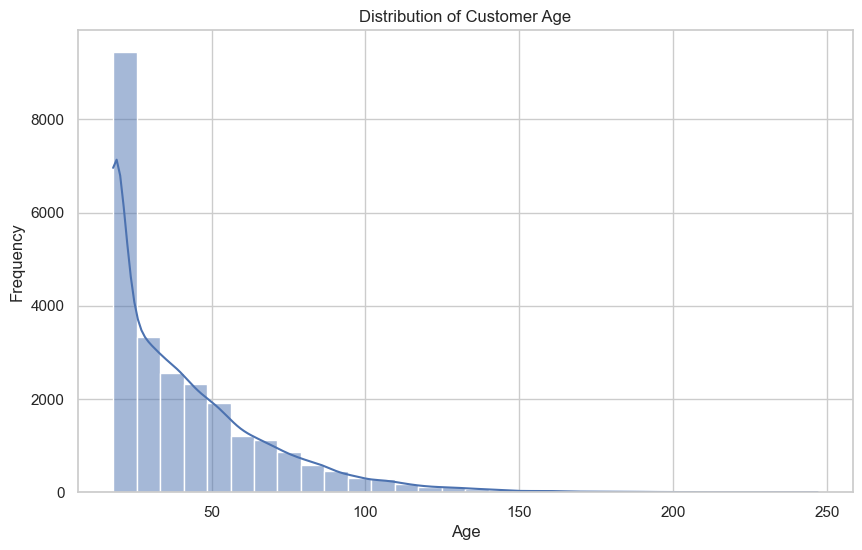

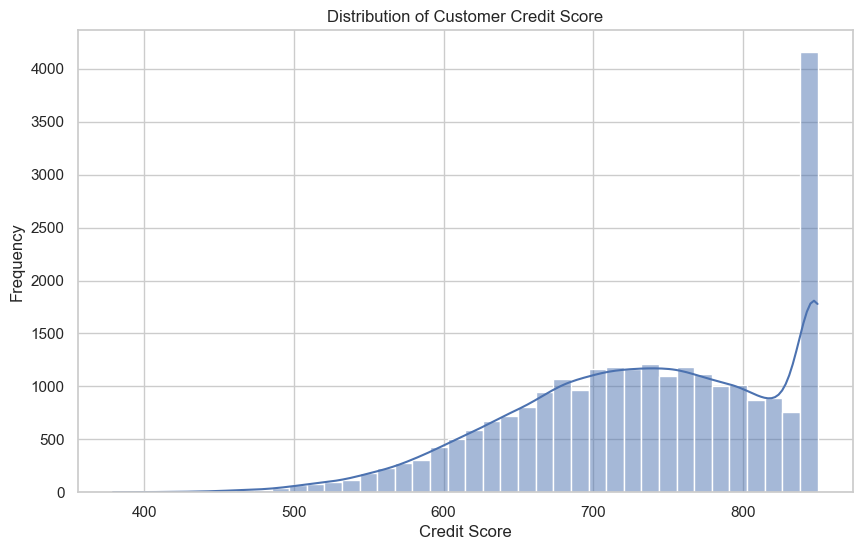

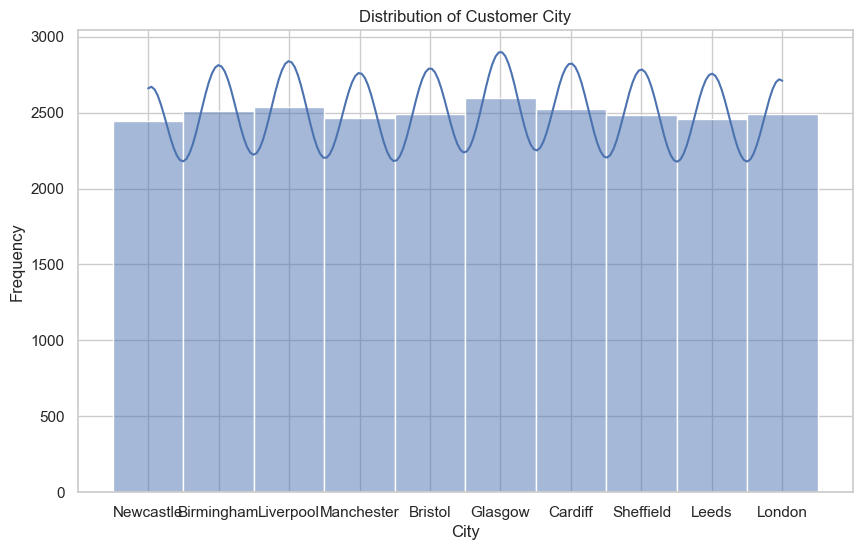

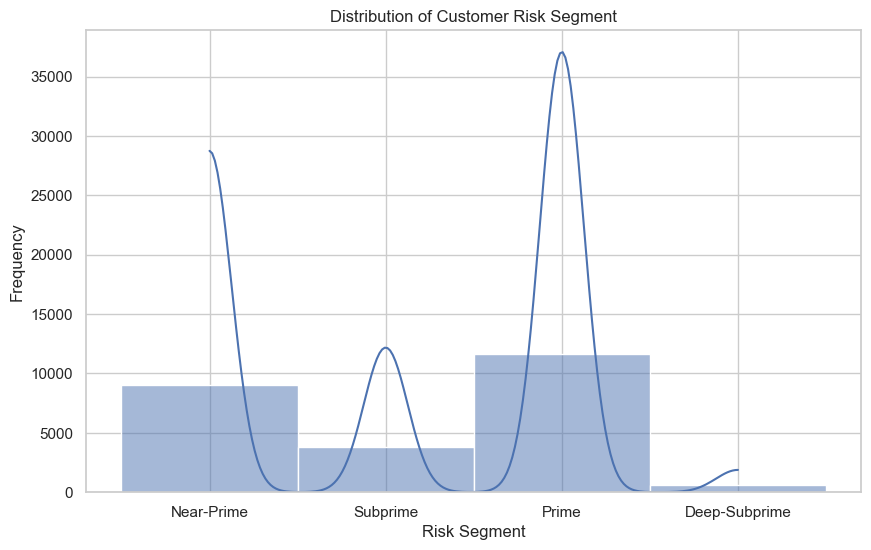

In [29]:
# --- 4.2 Transaction Data Analysis ---

print("\n------- Analysis of Transaction Data -------")

print("\n------- Transaction_Data Univariate Analysis -------")

# Plot distribution of transaction amount
plt.figure(figsize=(10, 6))
sns.histplot(transaction_data['amount'], kde=True, bins=50, log_scale=True)
plt.title('Distribution of Transaction Amount (Log Scale)')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Plot fraud flag
plt.figure(figsize=(8, 5))
sns.countplot(x='fraud_flag', data=transaction_data)
plt.title('Distribution of Fraud Flag')
plt.xlabel('Fraud Flag (1 = Fraud, 0 = Not Fraud)')
plt.ylabel('Count')
plt.show()

# Plot investigation status
plt.figure(figsize=(8, 5))
sns.countplot(x='investigation_status', data=transaction_data)
plt.title('Distribution of Investigation Status')
plt.xlabel('Investigation Status (1 = Under Investigation, 0 = Not Under Investigation)')
plt.ylabel('Count')
plt.show()

# Plot merchant category
plt.figure(figsize=(12, 6))
sns.countplot(x='merchant_category', data=transaction_data)
plt.title('Distribution of Merchant Category')
plt.xlabel('Merchant Category')
plt.ylabel('Count')
plt.show()

# Plot transaction type
plt.figure(figsize=(8, 5))
sns.countplot(x='transaction_type', data=transaction_data)
plt.title('Distribution of Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

# Plot device info
plt.figure(figsize=(12, 6))
sns.countplot(x='device_info', data=transaction_data)
plt.title('Distribution of Device Info')
plt.xlabel('Device Info')
plt.ylabel('Count')
plt.show()

# Plot device location info
plt.figure(figsize=(12, 6))
sns.countplot(x='location', data=transaction_data)
plt.title('Distribution of Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()


print("\n------- Customer_Profile Univariate Analysis -------")

# --- 4.3 Customer Profiles Analysis ---
print("\n--- Analysis of Customer Profiles ---")

# Plot distribution of customer age
plt.figure(figsize=(10, 6))
sns.histplot(customer_profiles['customer_age'], kde=True, bins=30)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of credit score
plt.figure(figsize=(10, 6))
sns.histplot(customer_profiles['credit_score'], kde=True, bins=40)
plt.title('Distribution of Customer Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of city
plt.figure(figsize=(10, 6))
sns.histplot(customer_profiles['city'], kde=True, bins=40)
plt.title('Distribution of Customer City')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of risk_segment score
plt.figure(figsize=(10, 6))
sns.histplot(customer_profiles['risk_segment'], kde=True, bins=40)
plt.title('Distribution of Customer Risk Segment')
plt.xlabel('Risk Segment')
plt.ylabel('Frequency')
plt.show()


## Comment:
# This notebook performs exploratory data analysis on the provided datasets.
# It includes univariate analysis of credit applications, transaction data, and customer profiles.
# Visualizations are created using seaborn and matplotlib to understand the distribution of key features.

 ### Transaction Data:
1. Transaction_type: Purchase = 94% , Transfer = 2.9% , ATM Withdrawal = 3%
2. Location = The locations are fairly distributed across London, Manchester, Leeds, etc
3. Device_info = The info are fairly distributed at 20% across Mobile, Chip, Contactless, Desktop, ATM.
4. Investigation_status - Not Investigated = 99.8% of the data while confirmed, pending and false positives = 0.1%
5. fraud_flag = Not Fraude= 99.8%, Fraud = 0.1%
6. merchant_category = Groceries = 20.6% , Restaurants = 17.2% followed by Online Shopping = 17%
7. Transaction Amount ranges from £1 and £183

###  Customer Profile:
1. Customer_age : Customer Age:  The age ranges between 18 years and 247 years, which indicate presence of outliers in the data.
2. Risk_segment : Near-Prime = 35.9%, Subprime = 15.2% , Prime = 46.4% , Deep-Subprime = 2.3%.



## Bi-varaite & Multivariate Analysis


--- Merging data for deeper insights ---
Merged DataFrame Shape: (100000, 22)
Columns after merge: ['application_id', 'customer_id', 'application_date', 'loan_amount', 'loan_purpose', 'employment_status_app', 'annual_income_app', 'debt_to_income_ratio', 'credit_score_app', 'application_status', 'default_flag', 'customer_age', 'annual_income_profile', 'employment_status_profile', 'account_tenure', 'product_holdings', 'relationship_value', 'risk_segment', 'behavioral_score', 'credit_score_profile', 'city', 'last_activity_date']
  application_id  customer_id application_date  loan_amount   loan_purpose  \
0    APP_0000001  CUST_008172       2023-09-03       164883  Home Purchase   
1    APP_0000002  CUST_016851       2023-05-02        59782  Home Purchase   
2    APP_0000003  CUST_016766       2024-08-08        23716   Car Purchase   
3    APP_0000004  CUST_018679       2024-07-22        13514   Car Purchase   
4    APP_0000005  CUST_019411       2024-08-13        13992   Car Purchase   

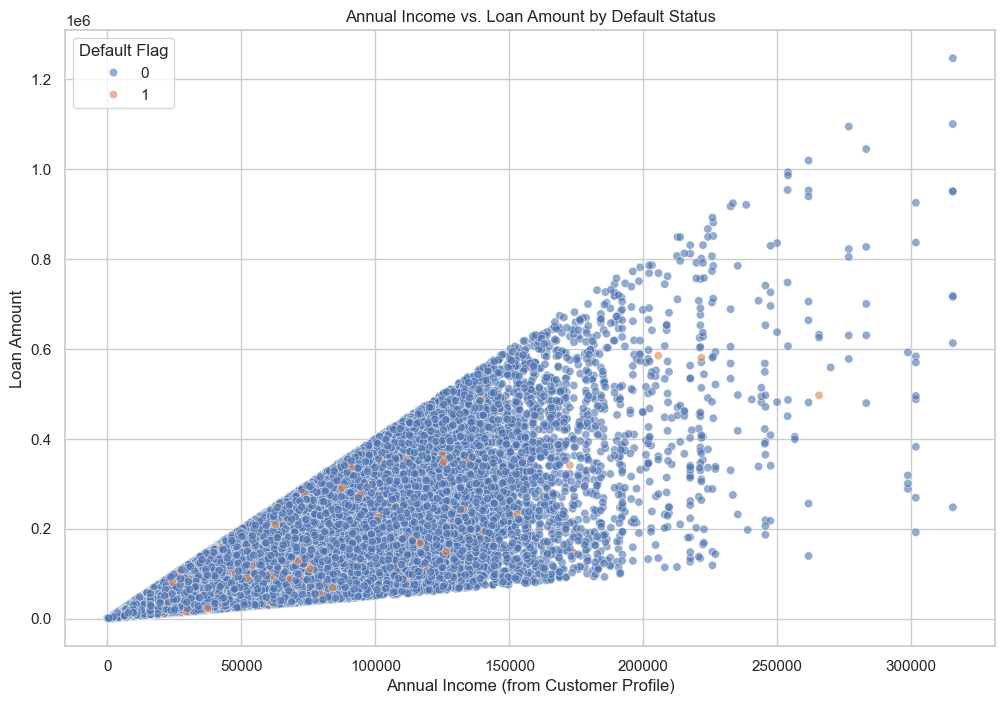

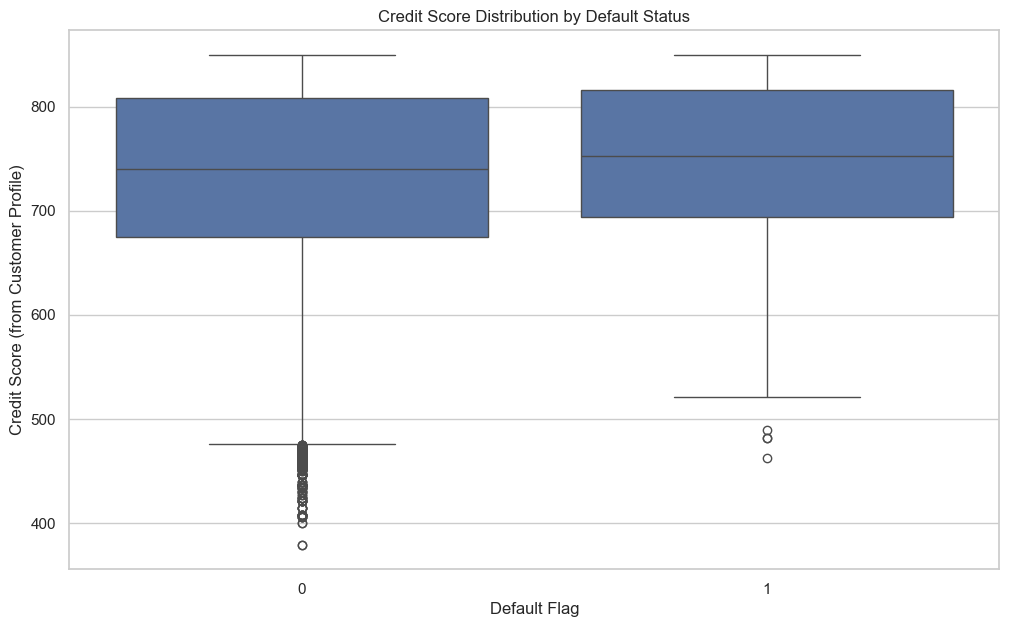

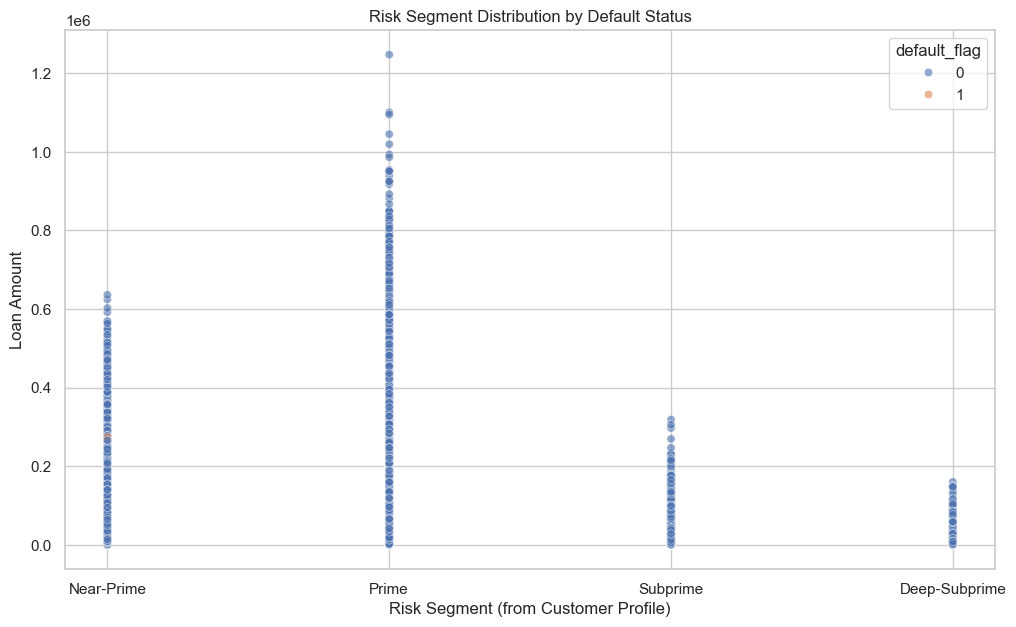

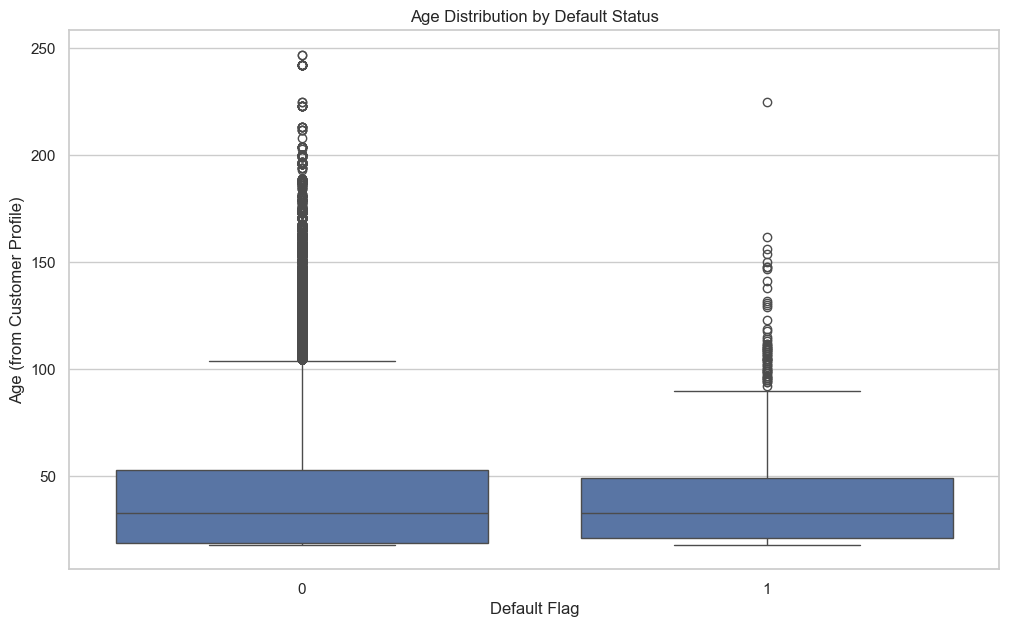

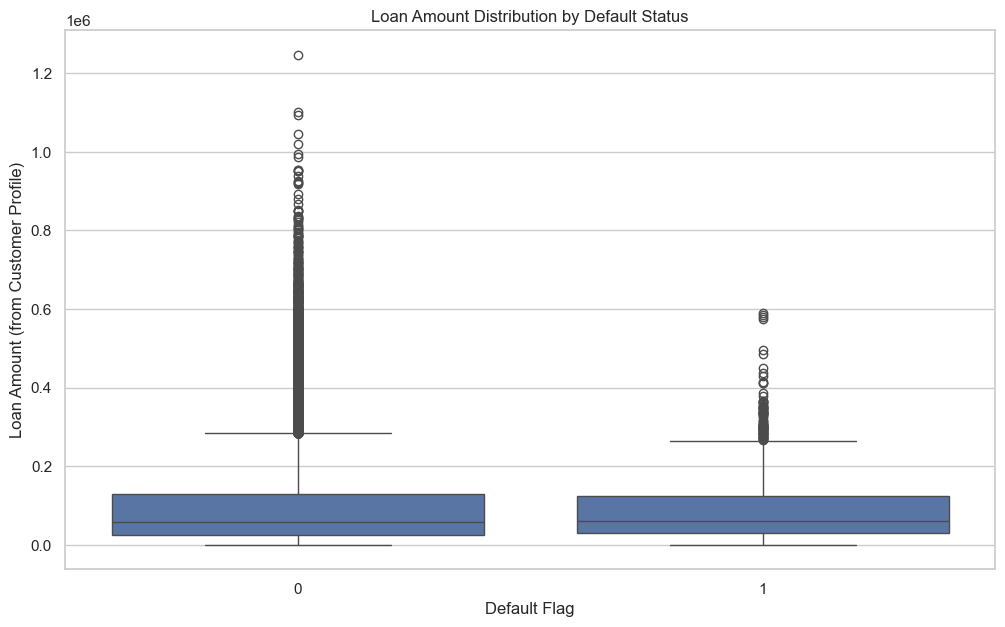

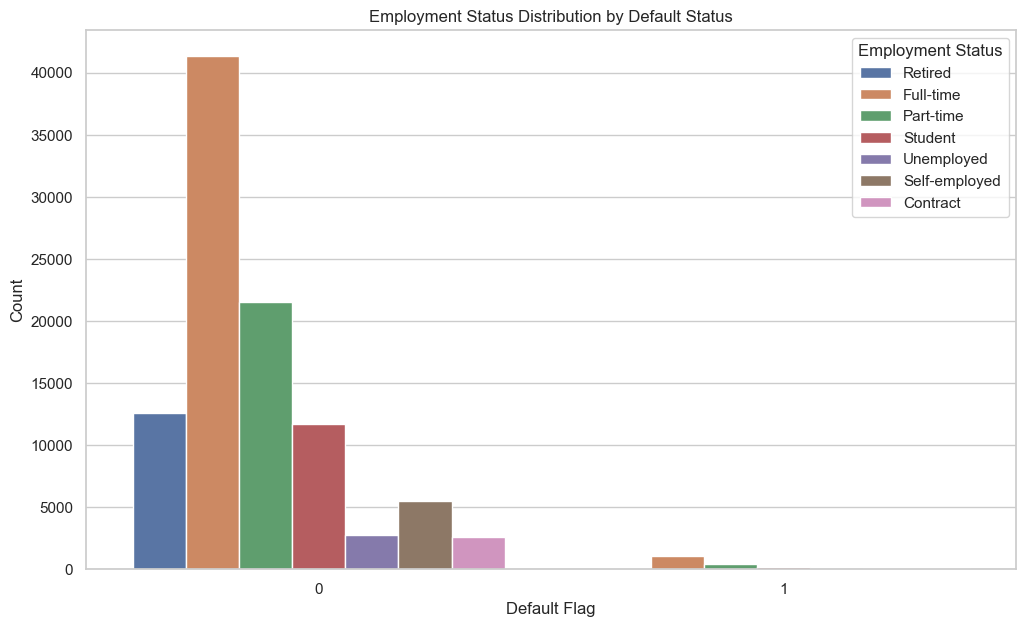

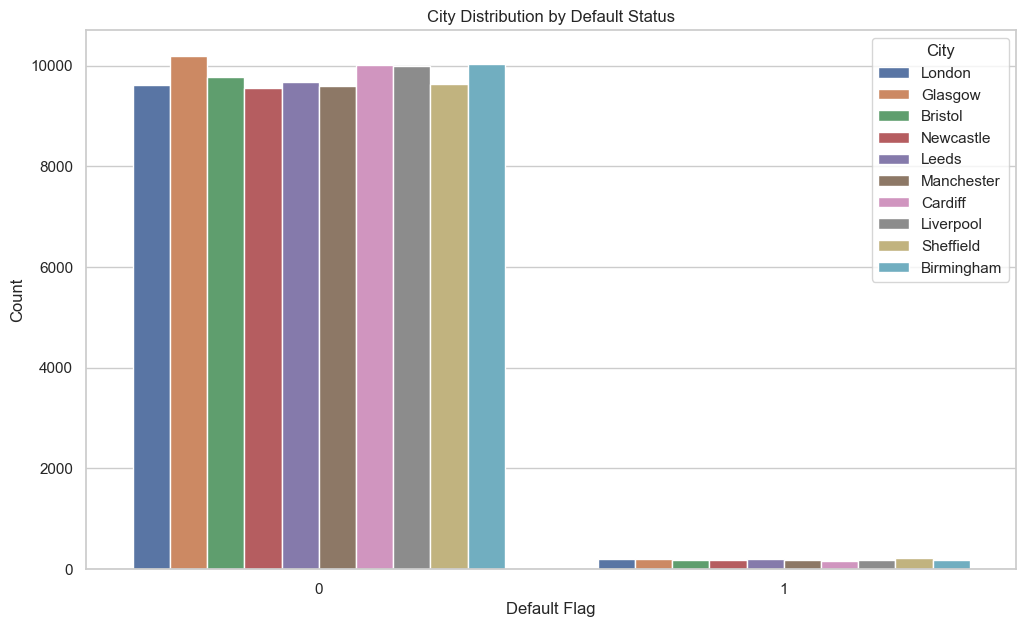

In [30]:
# --- 4.4 Merging data for deeper insights (Corrected) ---
print("\n--- Merging data for deeper insights ---")

# Merging application data with customer profiles, adding suffixes to handle duplicate column names
merged_df = pd.merge(
    credit_applications, 
    customer_profiles, 
    on='customer_id', 
    how='left', 
    # Suffixes: _app for credit_applications, _profile for customer_profiles
    suffixes=('_app', '_profile') 
)

print(f"Merged DataFrame Shape: {merged_df.shape}")
print("Columns after merge:", merged_df.columns.tolist())
print(merged_df.head())


# Relationship between Annual Income and Loan Amount by Default Status
# We use 'annual_income_profile' as the more reliable source of customer income
plt.figure(figsize=(12, 8))
sns.scatterplot(data=merged_df, x='annual_income_profile', y='loan_amount', hue='default_flag', alpha=0.6)
plt.title('Annual Income vs. Loan Amount by Default Status')
plt.xlabel('Annual Income (from Customer Profile)')
plt.ylabel('Loan Amount')
plt.legend(title='Default Flag')
plt.show()


# Credit Score distribution by Default Status
# We use 'credit_score_profile'
plt.figure(figsize=(12, 7))
sns.boxplot(data=merged_df, x='default_flag', y='credit_score_profile')
plt.title('Credit Score Distribution by Default Status')
plt.xlabel('Default Flag')
plt.ylabel('Credit Score (from Customer Profile)')
plt.show()


# Risk Segment distribution by Default Status
# We use 'risk_segment_profile'
plt.figure(figsize=(12, 7))
#sns.boxplot(data=merged_df, x='default_flag', y='risk_segment')
sns.scatterplot(data=merged_df, x='risk_segment', y='loan_amount', hue='default_flag', alpha=0.6)
plt.title('Risk Segment Distribution by Default Status')
plt.xlabel('Risk Segment (from Customer Profile)')
plt.ylabel('Loan Amount')
plt.show()

# Age distribution by Default Status
# We use 'customer_age_profile'
plt.figure(figsize=(12, 7))
sns.boxplot(data=merged_df, x='default_flag', y='customer_age')
plt.title('Age Distribution by Default Status')
plt.xlabel('Default Flag')
plt.ylabel('Age (from Customer Profile)')
plt.show()

# Loan Amount distribution by Default Status
# We use 'loan_amount_profile'
plt.figure(figsize=(12, 7))
sns.boxplot(data=merged_df, x='default_flag', y='loan_amount')
plt.title('Loan Amount Distribution by Default Status')
plt.xlabel('Default Flag')
plt.ylabel('Loan Amount (from Customer Profile)')
plt.show()

# Employment Status distribution by Default Status
# We use 'employment_status_profile'
plt.figure(figsize=(12, 7))
sns.countplot(data=merged_df, x='default_flag', hue='employment_status_profile')
plt.title('Employment Status Distribution by Default Status')
plt.xlabel('Default Flag')
plt.ylabel('Count')
plt.legend(title='Employment Status')
plt.show()

# City distribution by Default Status
# We use 'city_profile'
plt.figure(figsize=(12, 7))
sns.countplot(data=merged_df, x='default_flag', hue='city')
plt.title('City Distribution by Default Status')
plt.xlabel('Default Flag')
plt.ylabel('Count')
plt.legend(title='City')
plt.show()

### Comment:

1.  Relationship between Annual Income and Loan Amount by Default Status: The defaulters are those under £150,000 Annual income.

2.  Credit Score distribution by Default Status : The credite score of the efaulters falls witing the range of 500 and 850

3. Risk Segment distribution by Default Status : No meaningful info can be discerned here due to minute defaulters in the data.

4. Age distribution by Default Status : There are a  lot of outliers here but the defaulter's age falls mostl above 50 years old.

5. Loan Amount distribution by Default Status : The defaulters range from above £1,000 and above.

6. Employment Status distribution by Default Status : The defaulters falls into Full time and Part Time category.

7. City distribution by Default Status : The defaulters are evenly spread across the city.